In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = 17,7
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
np.set_printoptions(legacy='1.25')

# Import Data

## MCC for Results 1 2 & 3

In [3]:
os.chdir('/home/cadeniran/u1/amphiscan-pep')
df = pd.DataFrame(columns=['ID', 'MCC.1', 'MCC.2', 'MCC.3'])

subdir=[]
dir='/home/cadeniran/u1/amphiscan-pep/results.1'
dirlist = [ item for item in os.listdir(dir) if os.path.isdir(os.path.join(dir, item)) ]
for dir in dirlist:
    subdir.append(dir)
subdir.sort()
df['ID'] = subdir

In [4]:
# Import data for Results.1 2 & 3
for i in range(1,4):
    mcc=[]
    for p in subdir:
        with open('results.{}/{}/txt/check_accuracy.txt'.format(i,p), 'r') as f:
            lines = f.read().splitlines()
            last_line = lines[-2]
            lastCol = last_line.split(sep=' ')[3]
            mcc.append(lastCol)
    df['MCC.{}'.format(i)] = mcc

In [5]:
# Remove MCC cannnot be calcaulated && %
df = df.replace('be', np.nan).replace('%', '', regex=True)
# Convert to numbers, convert non-numeric values to NaN without raising error
df['MCC.1'] = pd.to_numeric(df['MCC.1'], errors='coerce')
df['MCC.2'] = pd.to_numeric(df['MCC.2'], errors='coerce')
df['MCC.3'] = pd.to_numeric(df['MCC.3'], errors='coerce')

## Adaptive thickness MCC for Results 1 2 & 3

In [6]:
dfat = pd.DataFrame(columns=['ID', 'MCC.1', 'MCC.2', 'MCC.3'])
dfat['ID'] = subdir

In [7]:
for i in range(1,4):
    mcc=[]
    for p in subdir:
        with open('results.{}/{}/txt/check_accuracy_AT.txt'.format(i,p), 'r') as f:
            lines = f.read().splitlines()
            last_line = lines[-2]
            lastCol = last_line.split(sep=' ')[3]
            mcc.append(lastCol)
    dfat['MCC.{}'.format(i)] = mcc

In [8]:
# Remove MCC cannnot be calcaulated && %
dfat = dfat.replace('be', np.nan).replace('%', '', regex=True)
# Convert to numbers, convert non-numeric values to NaN without raising error
dfat['MCC.1'] = pd.to_numeric(dfat['MCC.1'], errors='coerce')
dfat['MCC.2'] = pd.to_numeric(dfat['MCC.2'], errors='coerce')
dfat['MCC.3'] = pd.to_numeric(dfat['MCC.3'], errors='coerce')

## Make Plot standard MCC

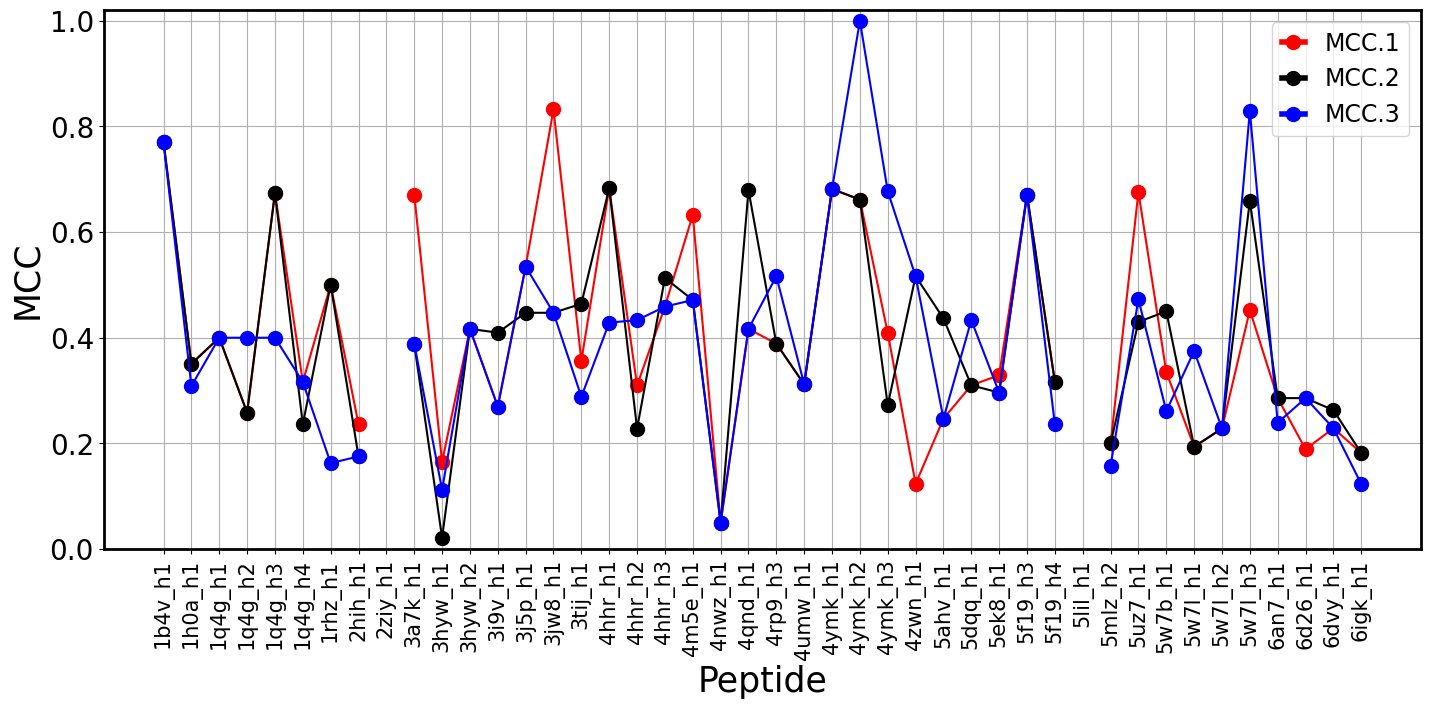

In [9]:
X=df["ID"]
Y1=df["MCC.1"]
Y2=df["MCC.2"]
Y3=df["MCC.3"]

# Plot
fig,ax=plt.subplots()
ax.plot(X, Y1, marker="o", markersize=10, c='red', label="MCC.1")
ax.plot(X, Y2, marker="o", markersize=10, c='black', label="MCC.2")
ax.plot(X, Y3, marker="o", markersize=10, c='blue', label="MCC.3")

leg = plt.legend(fontsize=17,handlelength=1,loc="best")

# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
    
ax.grid(True)
ax.set_xlabel("Peptide", fontsize=25)
ax.set_ylabel("MCC", fontsize=25)
ax.tick_params(axis='x', rotation=90, labelsize=15)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(0, 1.02)

# Save figure
plt.savefig("/home/cadeniran/ipn/figs/MCC3x.png", format='png',bbox_inches='tight')

## Make plot for Adaptive thickness MCC

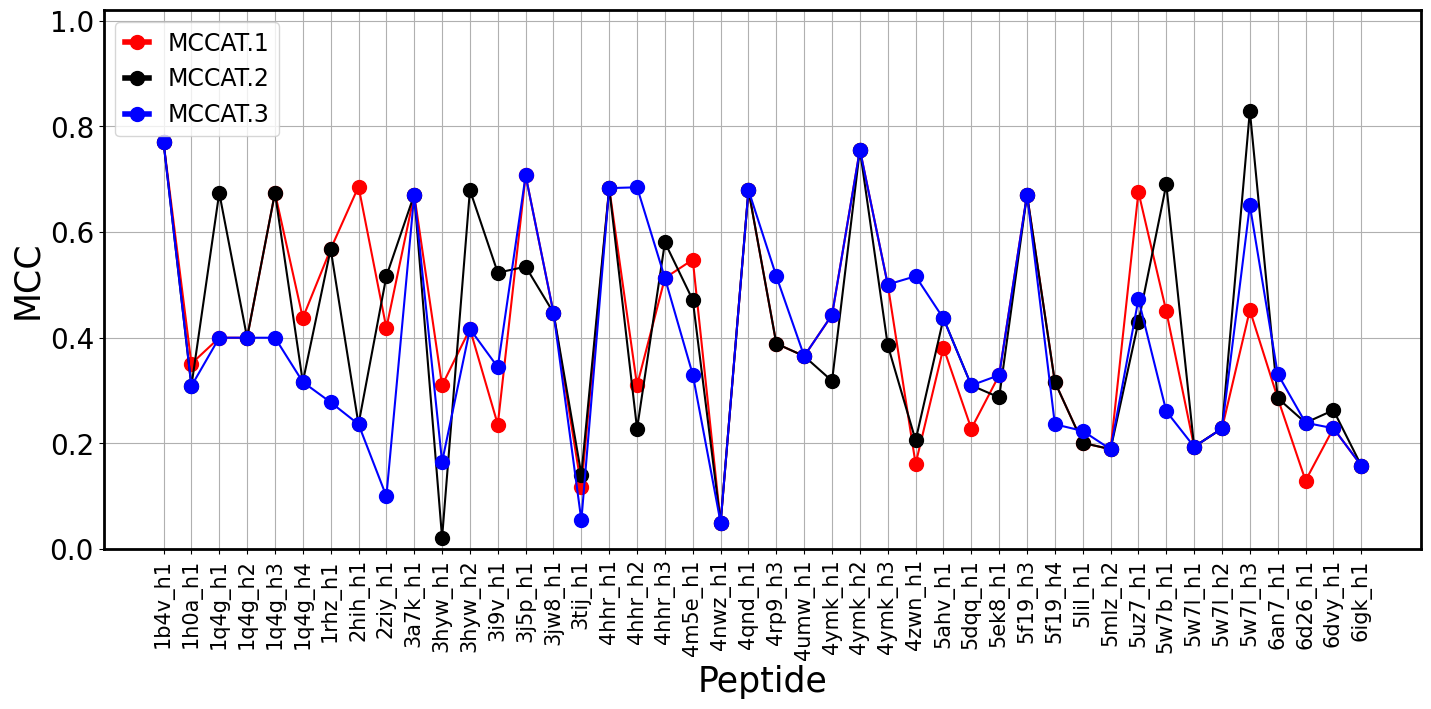

In [10]:
X=dfat["ID"]
Y1=dfat["MCC.1"]
Y2=dfat["MCC.2"]
Y3=dfat["MCC.3"]

# Plot
fig,ax=plt.subplots()
ax.plot(X, Y1, marker="o", markersize=10, c='red', label="MCCAT.1")
ax.plot(X, Y2, marker="o", markersize=10, c='black', label="MCCAT.2")
ax.plot(X, Y3, marker="o", markersize=10, c='blue', label="MCCAT.3")

leg = plt.legend(fontsize=17,handlelength=1,loc="best")

# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
    
ax.grid(True)
ax.set_xlabel("Peptide", fontsize=25)
ax.set_ylabel("MCC", fontsize=25)
ax.tick_params(axis='x', rotation=90, labelsize=15)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(0, 1.02)

# Save figure
plt.savefig("/home/cadeniran/ipn/figs/MCCAT3x.png", format='png',bbox_inches='tight')

## Individual Plots for Results 1 2 & 3

### Plot: Results.1

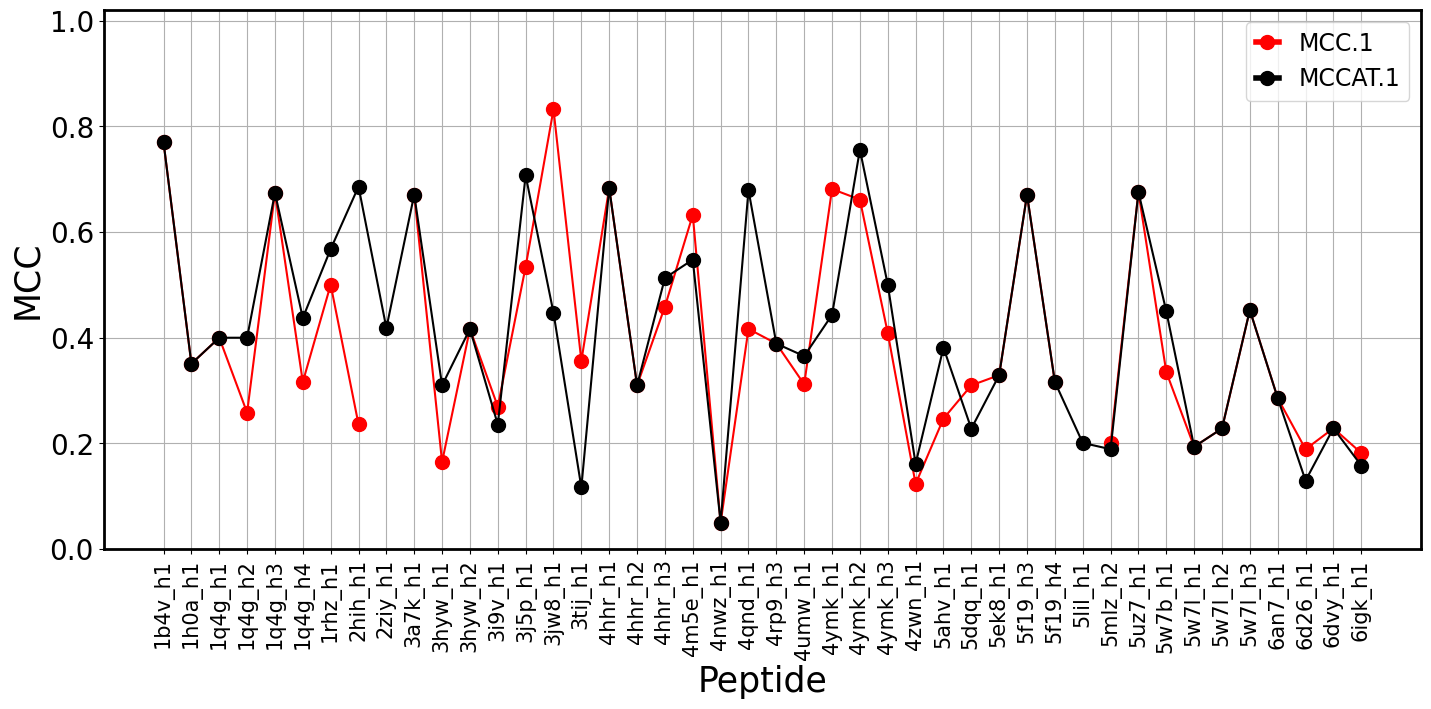

In [11]:
X=df["ID"]
Y1=df["MCC.1"]
Y2=dfat["MCC.1"]

# Plot
fig,ax=plt.subplots()
ax.plot(X, Y1, marker="o", markersize=10, c='red', label="MCC.1")
ax.plot(X, Y2, marker="o", markersize=10, c='black', label="MCCAT.1")

leg = plt.legend(fontsize=17,handlelength=1,loc="best")

# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
    
ax.grid(True)
ax.set_xlabel("Peptide", fontsize=25)
ax.set_ylabel("MCC", fontsize=25)
ax.tick_params(axis='x', rotation=90, labelsize=15)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(0, 1.02)

# Save figure
plt.savefig("/home/cadeniran/ipn/figs/MCC1.png", format='png',bbox_inches='tight')

### Plot: Results.2

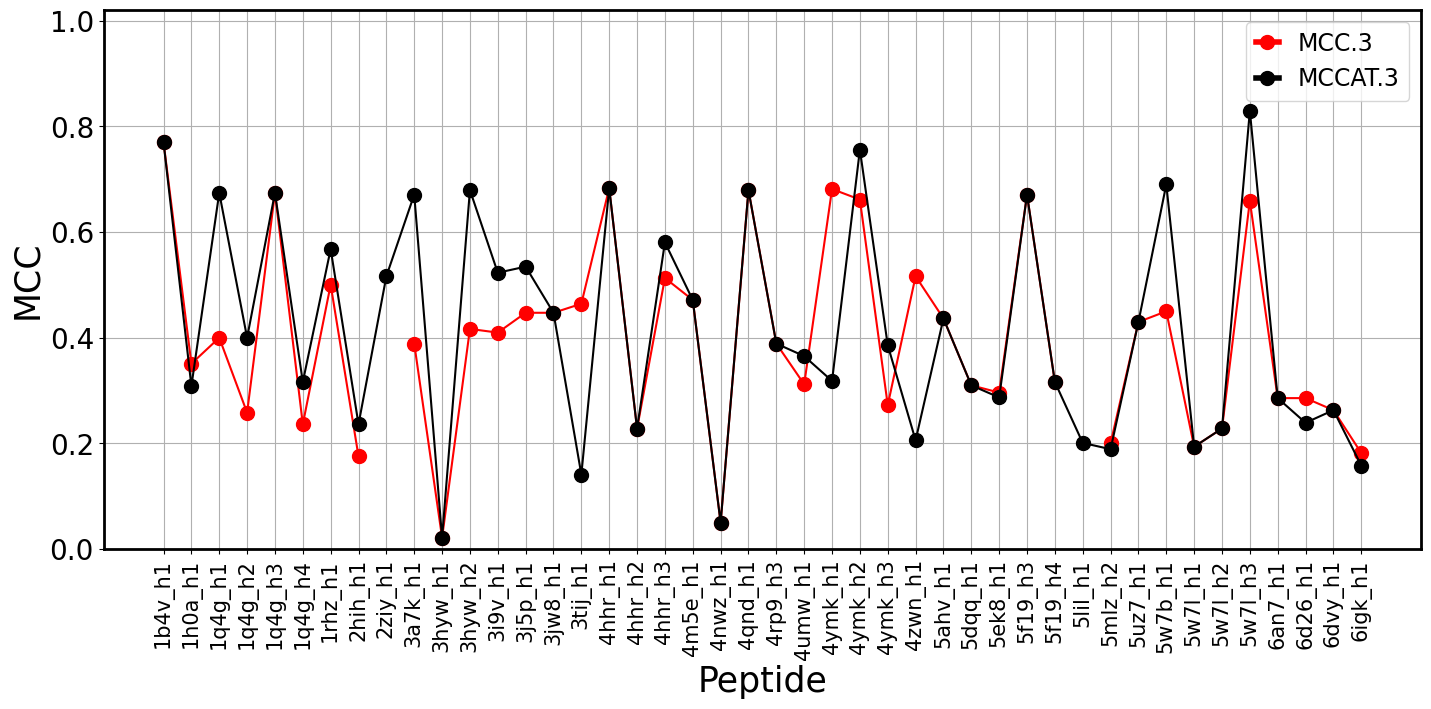

In [12]:
X=df["ID"]
Y1=df["MCC.2"]
Y2=dfat["MCC.2"]

# Plot
fig,ax=plt.subplots()
ax.plot(X, Y1, marker="o", markersize=10, c='red', label="MCC.3")
ax.plot(X, Y2, marker="o", markersize=10, c='black', label="MCCAT.3")

leg = plt.legend(fontsize=17,handlelength=1,loc="best")

# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
    
ax.grid(True)
ax.set_xlabel("Peptide", fontsize=25)
ax.set_ylabel("MCC", fontsize=25)
ax.tick_params(axis='x', rotation=90, labelsize=15)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(0, 1.02)

# Save figure
plt.savefig("/home/cadeniran/ipn/figs/MCC2.png", format='png',bbox_inches='tight')

### Plot: Results.3

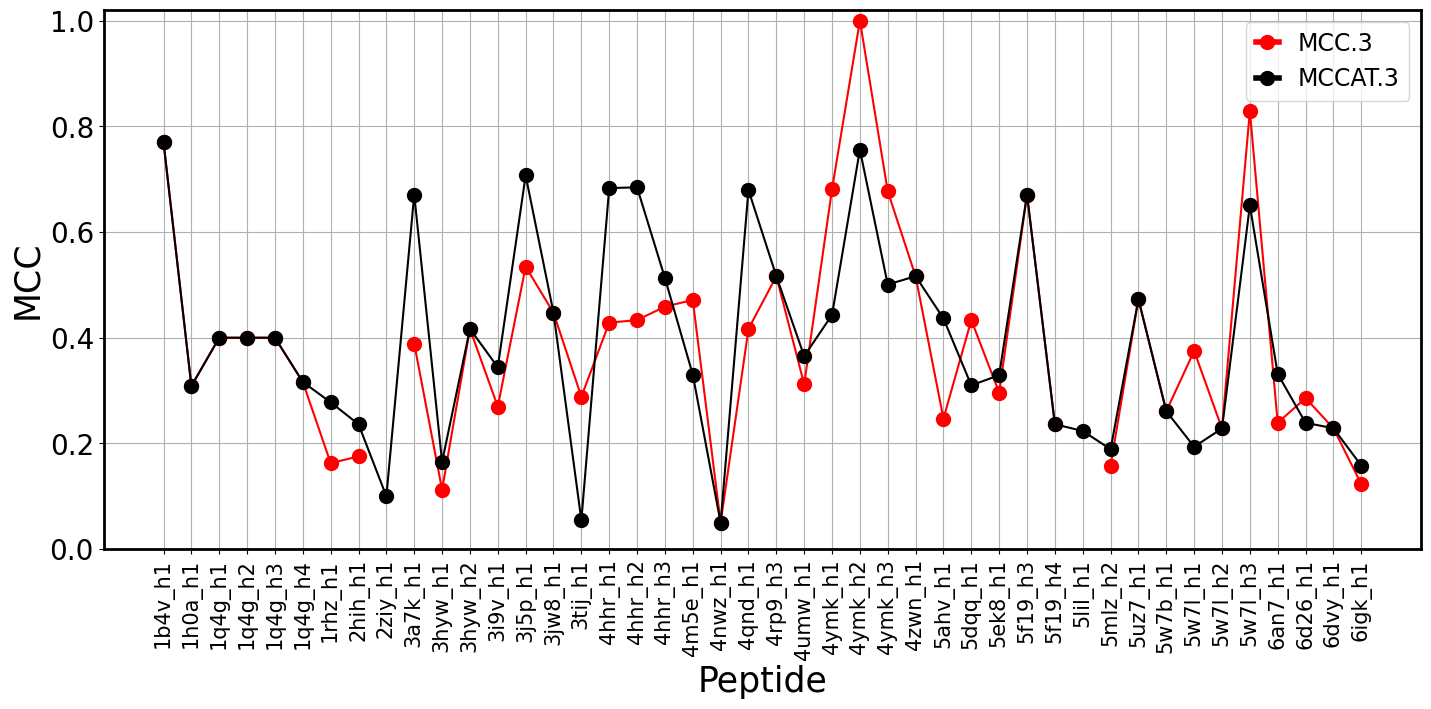

In [13]:
X=df["ID"]
Y1=df["MCC.3"]
Y2=dfat["MCC.3"]

# Plot
fig,ax=plt.subplots()
ax.plot(X, Y1, marker="o", markersize=10, c='red', label="MCC.3")
ax.plot(X, Y2, marker="o", markersize=10, c='black', label="MCCAT.3")

leg = plt.legend(fontsize=17,handlelength=1,loc="best")

# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
    
ax.grid(True)
ax.set_xlabel("Peptide", fontsize=25)
ax.set_ylabel("MCC", fontsize=25)
ax.tick_params(axis='x', rotation=90, labelsize=15)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(0, 1.02)

# Save figure
plt.savefig("/home/cadeniran/ipn/figs/MCC3.png", format='png',bbox_inches='tight')

### Save dataframe

In [18]:
t1 = df.round(2)
t2 = dfat.round(2)

In [19]:
os.chdir('/home/cadeniran/ipn/data')
t1.to_csv('MCC.csv', index=False)
t2.to_csv('MCCAT.csv', index=False)